In [1]:
from pycaret.regression import *
import pandas as pd

In [2]:
house_df=pd.read_csv('C:/Users/arun2/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [3]:
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
house_df = house_df.drop(['Id'], axis=1)

In [5]:
house_df.columns.unique

<bound method Index.unique of Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageC

In [6]:
objList = house_df.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [7]:
house_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
columns_with_missing_values = house_df.columns[house_df.isnull().sum() > 0]

In [9]:
columns_with_missing_values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer


drop_high_nan=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
house_df[drop_high_nan] = house_df[drop_high_nan].fillna('None')

small_nan_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 
                  'GarageArea','SaleType', 'SaleCondition']
small_impute = SimpleImputer(strategy='most_frequent')
house_df[small_nan_cols] = pd.DataFrame(small_impute.fit_transform(house_df[small_nan_cols]),columns=small_nan_cols)

In [11]:
mode_cols = ['MasVnrType', 'MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1']
mode_impute = SimpleImputer(strategy='most_frequent')
house_df[mode_cols] = pd.DataFrame(mode_impute.fit_transform(house_df[mode_cols]),columns=mode_cols)

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'GarageYrBlt']
house_df[garage_cols] = house_df[garage_cols].fillna('None')

house_df['LotFrontage'].fillna((house_df['LotFrontage'].mean()), inplace=True)

In [12]:
objList = house_df.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for values in objList:
    house_df[values] = le.fit_transform(house_df[values].astype(str))

house_df = house_df

In [14]:
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,...,0,3,4,1,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,1,3,3,0,4,...,0,3,2,1,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,1,3,3,0,4,...,0,3,0,3,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,1,3,3,0,4,...,0,3,4,1,0,4,2010,8,4,142125


In [15]:
reg = setup(data = house_df, 
             target = 'SalePrice',
             numeric_imputation = 'mean')

,Description,Value
0,Session id,8653
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 80)"
4,Transformed data shape,"(1460, 80)"
5,Transformed train set shape,"(1021, 80)"
6,Transformed test set shape,"(439, 80)"
7,Numeric features,79
8,Preprocess,True
9,Imputation type,simple


In [16]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,18592.4222,963320894.7250,30131.8280,0.8444,0.1524,0.1098,2.1970
lightgbm,Light Gradient Boosting Machine,18329.0708,1028486020.3050,31208.0300,0.8330,0.1490,0.1056,1.7340
et,Extra Trees Regressor,18507.5332,1109837239.0584,32202.3845,0.8221,0.1557,0.1090,2.0290
gbr,Gradient Boosting Regressor,18079.9334,1124374567.3116,31893.2098,0.8218,0.1475,0.1037,1.9060
rf,Random Forest Regressor,19169.1273,1126502204.3530,32597.5069,0.8188,0.1565,0.1121,2.2150
br,Bayesian Ridge,20556.6452,1419122463.2036,35681.6158,0.7700,0.1693,0.1200,1.5000
ada,AdaBoost Regressor,24223.7518,1425684065.0865,37102.7803,0.7681,0.2072,0.1605,1.6830
en,Elastic Net,20491.0572,1460474121.2569,36237.4195,0.7637,0.1658,0.1172,1.5270
llar,Lasso Least Angle Regression,21331.9846,1455859086.6362,36636.1737,0.7595,0.1796,0.1261,1.4800
ridge,Ridge Regression,21525.2521,1474031531.5815,36678.2434,0.7593,0.1832,0.1272,1.4640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=8653, ...)

In [17]:
lightgbm  = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19047.1215,1583755109.9236,39796.4208,0.7657,0.1668,0.1096
1,18893.4807,997972963.6923,31590.7101,0.8078,0.1522,0.1068
2,13886.3746,411835277.8765,20293.7251,0.9193,0.1457,0.0953
3,15895.6161,632977487.8197,25159.0439,0.8662,0.1332,0.0959
4,19379.1422,884283240.9073,29736.9003,0.8804,0.1532,0.1149
5,18567.4609,1352276412.4327,36773.3111,0.7612,0.1612,0.1123
6,17985.1556,794822101.4660,28192.5895,0.8642,0.1359,0.1001
7,22866.3004,2123677635.6801,46083.3770,0.7103,0.1676,0.1157
8,18983.2559,926515397.2013,30438.7154,0.8738,0.1424,0.1005


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tuned_gbr = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17812.0639,1359226985.1972,36867.6957,0.7989,0.1539,0.1008
1,17272.0251,878326185.9324,29636.5684,0.8309,0.1416,0.0969
2,13585.1245,424441687.1790,20601.9826,0.9169,0.1443,0.0925
3,17096.7209,718282651.2793,26800.7957,0.8482,0.1362,0.1007
4,16813.1434,719955551.8933,26831.9875,0.9026,0.1344,0.0999
5,17559.2571,1132227596.4718,33648.5898,0.8000,0.1491,0.1066
6,16057.1325,816773778.2994,28579.2543,0.8604,0.1222,0.0831
7,20632.7279,1798783884.1624,42412.0724,0.7546,0.1548,0.1064
8,18692.2526,887226885.3763,29786.3540,0.8791,0.1444,0.1028


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
final_model = finalize_model(tuned_gbr)


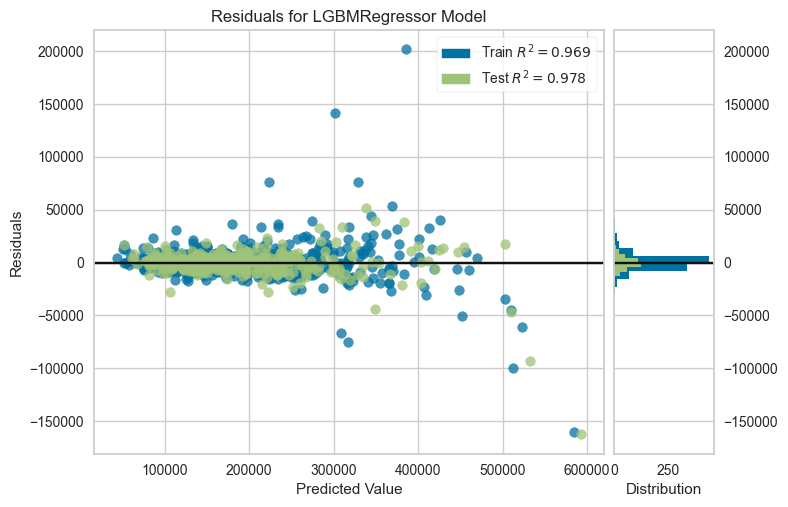

In [20]:
plot_model(final_model)


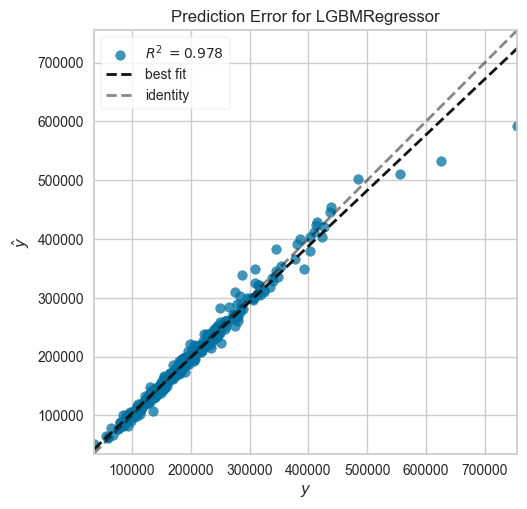

In [21]:
plot_model(final_model, plot = 'error')


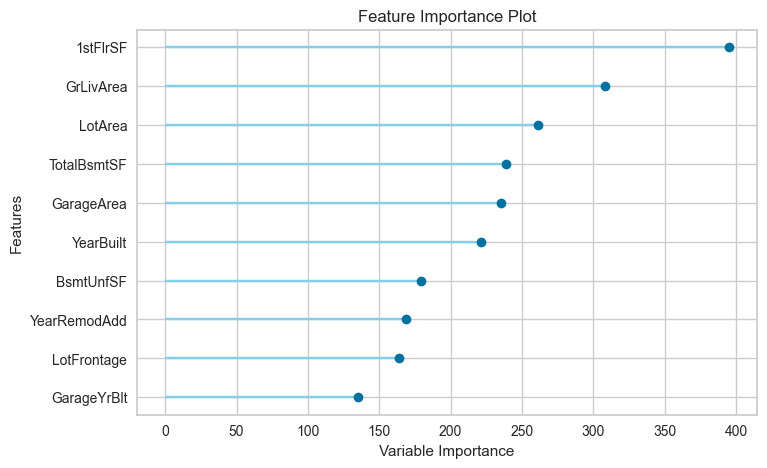

In [22]:
plot_model(final_model, plot='feature')

In [23]:
predict_model(final_model);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,6210.4148,154094591.6444,12413.4843,0.9776,0.0487,0.0326


In [24]:
house_df_test=pd.read_csv('C:/Users/arun2/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [25]:
house_df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [26]:
house_df_test = house_df_test.drop(['Id'], axis=1)

In [27]:
columns_with_missing_values = house_df_test.columns[house_df_test.isnull().sum() > 0]

In [28]:
columns_with_missing_values

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [29]:
from sklearn.impute import SimpleImputer


drop_high_nan=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
house_df_test[drop_high_nan] = house_df_test[drop_high_nan].fillna('None')

small_nan_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 
                  'GarageArea','SaleType', 'SaleCondition']
small_impute = SimpleImputer(strategy='most_frequent')
house_df_test[small_nan_cols] = pd.DataFrame(small_impute.fit_transform(house_df_test[small_nan_cols]),columns=small_nan_cols)

In [30]:
mode_cols = ['MasVnrType', 'MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1']
mode_impute = SimpleImputer(strategy='most_frequent')
house_df[mode_cols] = pd.DataFrame(mode_impute.fit_transform(house_df[mode_cols]),columns=mode_cols)

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'GarageYrBlt']
house_df[garage_cols] = house_df[garage_cols].fillna('None')

house_df['LotFrontage'].fillna((house_df['LotFrontage'].mean()), inplace=True)

In [31]:
objList = house_df_test.select_dtypes(include = "object").columns
print (objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [32]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for values in objList:
    house_df_test[values] = le.fit_transform(house_df_test[values].astype(str))

house_df_test = house_df_test

In [33]:
house_df_test.columns.unique

<bound method Index.unique of Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageC

In [34]:
test_preds = predict_model(final_model, house_df_test)
test_preds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction_label
0,20,2,80.0,11622,1,1,3,3,0,4,...,0,2,2,1,0,6,2010,8,4,134789.395472
1,20,3,81.0,14267,1,1,0,3,0,0,...,0,2,4,0,12500,6,2010,8,4,163540.922313
2,60,3,74.0,13830,1,1,0,3,0,4,...,0,2,2,1,0,3,2010,8,4,172445.306446
3,60,3,78.0,9978,1,1,0,3,0,4,...,0,2,4,1,0,6,2010,8,4,190712.370239
4,120,3,43.0,5005,1,1,0,1,0,4,...,0,2,4,1,0,1,2010,8,4,196079.156718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,1,3,3,0,4,...,0,2,4,1,0,6,2006,8,4,82903.642799
1455,160,4,21.0,1894,1,1,3,3,0,4,...,0,2,4,1,0,4,2006,8,0,82802.025134
1456,20,3,160.0,20000,1,1,3,3,0,4,...,0,2,4,1,0,9,2006,8,0,144917.673031
1457,85,3,62.0,10441,1,1,3,3,0,4,...,0,2,2,3,700,7,2006,8,4,121719.390146


In [35]:
house_df_final =pd.read_csv('C:/Users/arun2/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [36]:
house_df_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [37]:
sub = house_df_final[['Id']]
sub['SalePrice'] = test_preds['prediction_label'].round(1)

In [38]:
sub.to_csv('House_submission.csv', index=None)